# Código y Visualizaciones

* Para poder ejecutar las celdas correctamente y visualizar los graficos, es necesario hacerlo de forma secuencial, partiendo desde la importancion de datos.
* Cada sección puede ejecutarse de forma independiente a la otra, en caso de algun problema intente ejecutar nuevamente la Importancion de datos, o las celdas anteriores a la seccion.
* Este Colab fue realizado para el desafio de Alura Latam, mas información en el siguiente enlace [Desafío Data Science 1](https://github.com/popex404/Desafio-Data-Science-1)


## Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar nombre de tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


## 1. Análisis de facturación



In [ ]:
# Sumar el total de las ventas por tienda
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

print(f"Facturación total Tienda 1: {ingreso_total_tienda1}")
print(f"Facturación total Tienda 2: {ingreso_total_tienda2}")
print(f"Facturación total Tienda 3: {ingreso_total_tienda3}")
print(f"Facturación total Tienda 4: {ingreso_total_tienda4}")

Facturación total Tienda 1: 1150880400.0
Facturación total Tienda 2: 1116343500.0
Facturación total Tienda 3: 1098019600.0
Facturación total Tienda 4: 1038375700.0


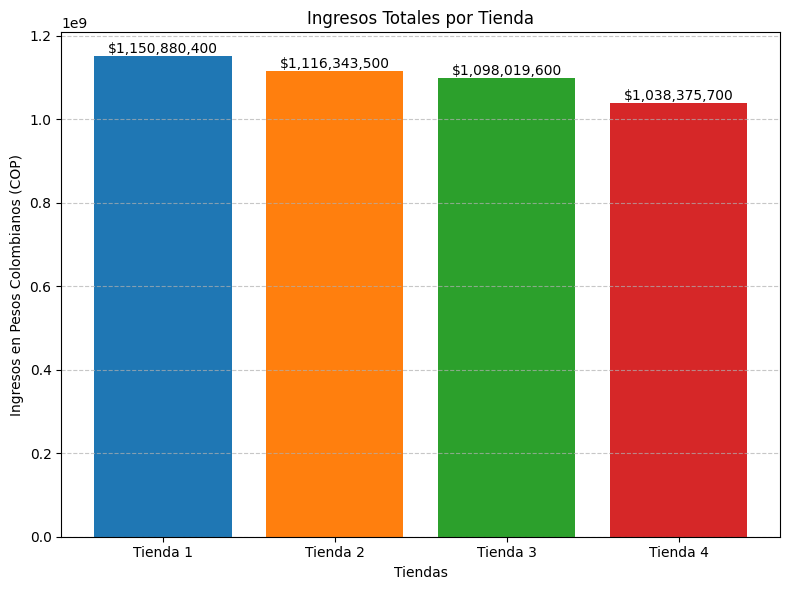

In [ ]:
# Datos para el gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4]
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colores distintos para cada barra

# Crear gráfico de columnas
plt.figure(figsize=(8, 6))
barras = plt.bar(tiendas, ingresos, color=colores)

# Agregar etiquetas a cada barra
for barra, ingreso in zip(barras, ingresos):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height(), f"${ingreso:,.0f}",
             ha='center', va='bottom', fontsize=10)

# Personalizar gráfico
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingresos en Pesos Colombianos (COP)')
plt.xlabel('Tiendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Podemos observar que la Tienda 1 presenta la mayor rentabilidad y la Tienda 4 la menor, aun así todas las tiendas han logrado superar los mil millones en pesos colombianos.

## 2. Ventas por categoría

In [ ]:
# Obtener el listado de categorias por tienda
Categorias_unicas_tienda1 = list(set(tienda['Categoría del Producto']))
Categorias_unicas_tienda2 = list(set(tienda2['Categoría del Producto']))
Categorias_unicas_tienda3 = list(set(tienda3['Categoría del Producto']))
Categorias_unicas_tienda4 = list(set(tienda4['Categoría del Producto']))

# Crear una lista de listas con valores repetidos de cada categoria
lista_de_listas_tienda1 = []
lista_de_listas_tienda2 = []
lista_de_listas_tienda3 = []
lista_de_listas_tienda4 = []

for categoria in Categorias_unicas_tienda1:
    lista = [e for e in tienda['Categoría del Producto'] if e == categoria]
    lista_de_listas_tienda1.append(lista)
for categoria in Categorias_unicas_tienda2:
    lista = [e for e in tienda2['Categoría del Producto'] if e == categoria]
    lista_de_listas_tienda2.append(lista)
for categoria in Categorias_unicas_tienda3:
    lista = [e for e in tienda3['Categoría del Producto'] if e == categoria]
    lista_de_listas_tienda3.append(lista)
for categoria in Categorias_unicas_tienda4:
    lista = [e for e in tienda4['Categoría del Producto'] if e == categoria]
    lista_de_listas_tienda4.append(lista)

# Creando un diccionario en el que la clave es el nombre de cada categoria unica y el valor es la cantidad de elementos
conteo_valores_tienda1 = {Categorias_unicas_tienda1[i]: len(lista_de_listas_tienda1[i]) for i in range(len(Categorias_unicas_tienda1))}
conteo_valores_tienda2 = {Categorias_unicas_tienda2[i]: len(lista_de_listas_tienda2[i]) for i in range(len(Categorias_unicas_tienda2))}
conteo_valores_tienda3 = {Categorias_unicas_tienda3[i]: len(lista_de_listas_tienda3[i]) for i in range(len(Categorias_unicas_tienda3))}
conteo_valores_tienda4 = {Categorias_unicas_tienda4[i]: len(lista_de_listas_tienda4[i]) for i in range(len(Categorias_unicas_tienda4))}

# Ordenar los diccionarios por las categorias mas vendidas a las menos vendidas.

def ordenar_diccionario(diccionario):
    return dict(sorted(diccionario.items(), key=lambda item: item[1], reverse=True))

# Ordenando cada uno
Ventas_por_Categoria_Tienda1 = ordenar_diccionario(conteo_valores_tienda1)
Ventas_por_Categoria_Tienda2 = ordenar_diccionario(conteo_valores_tienda2)
Ventas_por_Categoria_Tienda3 = ordenar_diccionario(conteo_valores_tienda3)
Ventas_por_Categoria_Tienda4 = ordenar_diccionario(conteo_valores_tienda4)

# Imprimir resultados
print("\nVentas por Categoria en la Tienda 1:\n", Ventas_por_Categoria_Tienda1)
print("\nVentas por Categoria en la Tienda 2:\n", Ventas_por_Categoria_Tienda2)
print("\nVentas por Categoria en la Tienda 3:\n", Ventas_por_Categoria_Tienda3)
print("\nVentas por Categoria en la Tienda 4:\n", Ventas_por_Categoria_Tienda4)


Ventas por Categoria en la Tienda 1:
 {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}

Ventas por Categoria en la Tienda 2:
 {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}

Ventas por Categoria en la Tienda 3:
 {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Artículos para el hogar': 177, 'Instrumentos musicales': 177}

Ventas por Categoria en la Tienda 4:
 {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}


### 2.a Distribución de Ventas por Categoría

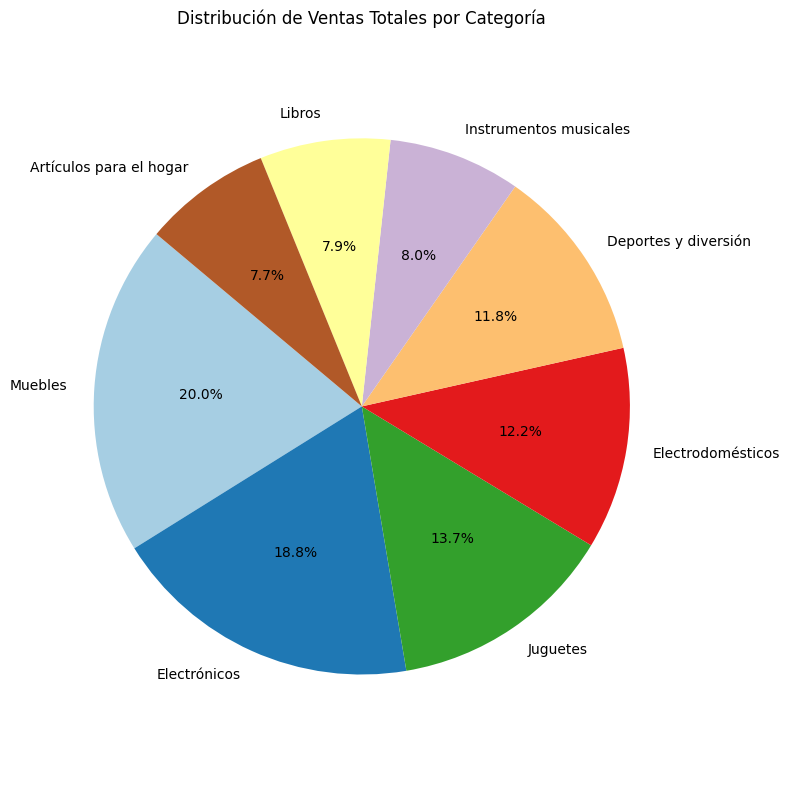

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Categorías y colores consistentes
categorias = list(Ventas_por_Categoria_Tienda1.keys())

valores_t1 = [Ventas_por_Categoria_Tienda1[cat] for cat in categorias]
valores_t2 = [Ventas_por_Categoria_Tienda2[cat] for cat in categorias]
valores_t3 = [Ventas_por_Categoria_Tienda3[cat] for cat in categorias]
valores_t4 = [Ventas_por_Categoria_Tienda4[cat] for cat in categorias]


# Gráfico de torta (sin cambios)
ventas_totales_categoria = {
    cat: Ventas_por_Categoria_Tienda1[cat] +
         Ventas_por_Categoria_Tienda2[cat] +
         Ventas_por_Categoria_Tienda3[cat] +
         Ventas_por_Categoria_Tienda4[cat]
    for cat in categorias
}

labels = list(ventas_totales_categoria.keys())
sizes = list(ventas_totales_categoria.values())
colors = [color_map[cat] for cat in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Ventas Totales por Categoría')
plt.axis('equal')
plt.tight_layout()
plt.show()

Podemos observar que la categoria mas popular son los muebles, ademas que las primeras tres categorias engrosan más del 50% de todas las ventas.

### 2.b Ventas de tienda por categoría

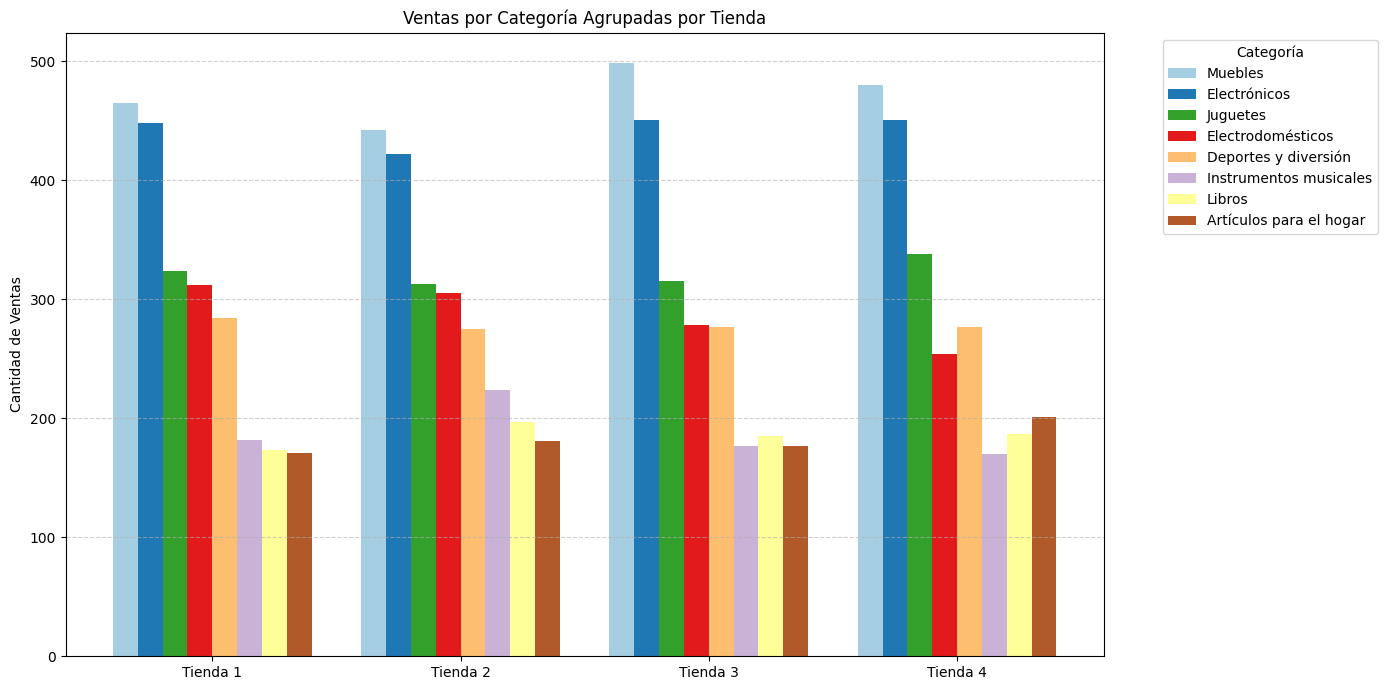

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores
colors = plt.cm.Paired(np.linspace(0, 1, len(categorias)))
color_map = dict(zip(categorias, colors))

# Datos por tienda en una lista por categoría
ventas_por_categoria = [valores_t1, valores_t2, valores_t3, valores_t4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
x = np.arange(len(tiendas))

# Configuración para barras agrupadas
bar_width = 0.1  # ancho de cada barra
fig, ax = plt.subplots(figsize=(14, 7))

# Desplazar barras por categoría
for i, cat in enumerate(categorias):
    valores = [ventas_por_categoria[j][i] for j in range(len(tiendas))]
    offset = (i - len(categorias)/2) * bar_width + bar_width / 2
    ax.bar(x + offset, valores, width=bar_width, label=cat, color=color_map[cat])

# Personalizar gráfico
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.set_ylabel('Cantidad de Ventas')
ax.set_title('Ventas por Categoría Agrupadas por Tienda')
ax.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Se puede observar con claridad que los Muebles y Electronicos son las categorias mas populares, mientras que los instrumentos musicales, libros y artículos para el hogar son las menos populares, donde dependiendo de la tienda podemos ver como compiten para no quedar último.

## 3. Calificación promedio de la tienda


In [ ]:
# Funcion para calcular el promedio de una lista
def promedio_lista(lista):
    if len(lista) == 0:
        print("Ingrese una lista no vacía")
        return None
    return sum(lista) / len(lista)

# Calcular el promedio de calificacion por tienda
Tienda_avg_Score = round(promedio_lista(tienda['Calificación']),3)
Tienda2_avg_Score = round(promedio_lista(tienda2['Calificación']),3)
Tienda3_avg_Score = round(promedio_lista(tienda3['Calificación']),3)
Tienda4_avg_Score = round(promedio_lista(tienda4['Calificación']),3)

# Imprimir resultados
print("\nLa puntuacion media de la Tienda 1 es:\n", Tienda_avg_Score)
print("\nLa puntuacion media de la Tienda 2 es:\n", Tienda2_avg_Score)
print("\nLa puntuacion media de la Tienda 3 es:\n", Tienda3_avg_Score)
print("\nLa puntuacion media de la Tienda 4 es:\n", Tienda4_avg_Score)


La puntuacion media de la Tienda 1 es:
 3.977

La puntuacion media de la Tienda 2 es:
 4.037

La puntuacion media de la Tienda 3 es:
 4.048

La puntuacion media de la Tienda 4 es:
 3.996


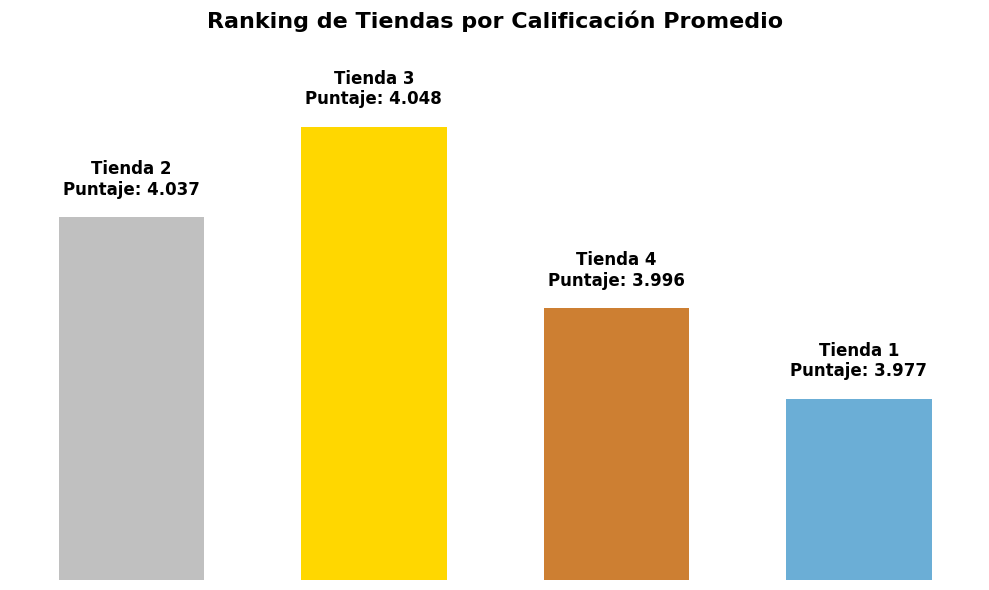

In [ ]:
import matplotlib.pyplot as plt

# Diccionario con las puntuaciones
scores = {
    "Tienda 1": Tienda_avg_Score,
    "Tienda 2": Tienda2_avg_Score,
    "Tienda 3": Tienda3_avg_Score,
    "Tienda 4": Tienda4_avg_Score
}

# Ordenar por puntuación
ranking = sorted(scores.items(), key=lambda x: x[1], reverse=True)

labels = [r[0] for r in ranking]
values = [r[1] for r in ranking]

# Colores: Oro, Plata, Bronce, Azul suave
colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#6BAED6']
heights = [2.5, 2.0, 1.5, 1.0]
positions = [1, 0, 2, 3]  # Posiciones en X para dar forma de podio

fig, ax = plt.subplots(figsize=(10, 6))

for i, pos in enumerate(positions):
    ax.bar(pos, heights[i], color=colors[i], width=0.6)
    ax.text(pos, heights[i] + 0.1,
            f"{labels[i]}\nPuntaje: {values[i]:.3f}",
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlim(-0.5, 3.5)
ax.set_ylim(0, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Ranking de Tiendas por Calificación Promedio', fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

El grafico esta diseñado para poder exagerar las diferencias entre las calificaciones, sin embargo todas las tiendas cumplen con casi el mismo desempeño al tener una nota bastante cercana a 4.

## 4. Productos más y menos vendidos

In [ ]:
# Obtener el listado de productos por tienda
Productos_unicos_tienda1 = list(set(tienda['Producto']))
Productos_unicos_tienda2 = list(set(tienda2['Producto']))
Productos_unicos_tienda3 = list(set(tienda3['Producto']))
Productos_unicos_tienda4 = list(set(tienda4['Producto']))

# Crear una lista de listas con valores repetidos de cada producto
listas_tienda1 = []
listas_tienda2 = []
listas_tienda3 = []
listas_tienda4 = []

for producto in Productos_unicos_tienda1:
    lista = [e for e in tienda['Producto'] if e == producto]
    listas_tienda1.append(lista)
for producto in Productos_unicos_tienda2:
    lista = [e for e in tienda2['Producto'] if e == producto]
    listas_tienda2.append(lista)
for producto in Productos_unicos_tienda3:
    lista = [e for e in tienda3['Producto'] if e == producto]
    listas_tienda3.append(lista)
for producto in Productos_unicos_tienda4:
    lista = [e for e in tienda4['Producto'] if e == producto]
    listas_tienda4.append(lista)

# Creando un diccionario en el que la clave es el nombre de cada producto unico y el valor es la cantidad de ventas
conteo_tienda1 = {Productos_unicos_tienda1[i]: len(listas_tienda1[i]) for i in range(len(Productos_unicos_tienda1))}
conteo_tienda2 = {Productos_unicos_tienda2[i]: len(listas_tienda2[i]) for i in range(len(Productos_unicos_tienda2))}
conteo_tienda3 = {Productos_unicos_tienda3[i]: len(listas_tienda3[i]) for i in range(len(Productos_unicos_tienda3))}
conteo_tienda4 = {Productos_unicos_tienda4[i]: len(listas_tienda4[i]) for i in range(len(Productos_unicos_tienda4))}

# Ordenar los diccionarios por los productos mas vendidas a los menos vendidas.

def ordenar_diccionario(diccionario):
    return dict(sorted(diccionario.items(), key=lambda item: item[1], reverse=True))

# Ordenando cada uno
Ventas_por_Producto_Tienda1 = ordenar_diccionario(conteo_tienda1)
Ventas_por_Producto_Tienda2 = ordenar_diccionario(conteo_tienda2)
Ventas_por_Producto_Tienda3 = ordenar_diccionario(conteo_tienda3)
Ventas_por_Producto_Tienda4 = ordenar_diccionario(conteo_tienda4)

# Imprimir resultados
print("\nVentas por Producto en la Tienda 1:\n", Ventas_por_Producto_Tienda1)
print("\nVentas por Producto en la Tienda 2:\n", Ventas_por_Producto_Tienda2)
print("\nVentas por Producto en la Tienda 3:\n", Ventas_por_Producto_Tienda3)
print("\nVentas por Producto en la Tienda 4:\n", Ventas_por_Producto_Tienda4)


Ventas por Producto en la Tienda 1:
 {'Armario': 60, 'TV LED UHD 4K': 60, 'Microondas': 60, 'Secadora de ropa': 58, 'Mesa de noche': 56, 'Bloques de construcción': 56, 'Balón de baloncesto': 55, 'Vaso térmico': 54, 'Bicicleta': 54, 'Refrigerador': 54, 'Impresora': 54, 'Batería': 53, 'Cubertería': 52, 'Carrito de control remoto': 52, 'Modelado predictivo': 51, 'Auriculares': 50, 'Ajedrez de madera': 49, 'Iphone 15': 49, 'Lavavajillas': 48, 'Guitarra eléctrica': 47, 'Lavadora de ropa': 47, 'Silla de oficina': 46, 'Guitarra acústica': 46, 'Sofá reclinable': 46, 'Estufa': 45, 'Cubo mágico 8x8': 44, 'Cama box': 44, 'Kit de bancas': 44, 'Mesa de centro': 44, 'Smart TV': 44, 'Cama king': 44, 'Smartwatch': 43, 'Set de ollas': 43, 'Juego de mesa': 43, 'Dashboards con Power BI': 42, 'Balón de voleibol': 42, 'Tablet ABXY': 42, 'Sillón': 41, 'Set de vasos': 41, 'Iniciando en programación': 41, 'Muñeca bebé': 40, 'Cuerda para saltar': 40, 'Mesa de comedor': 40, 'Asistente virtual': 40, 'Dinosaurio

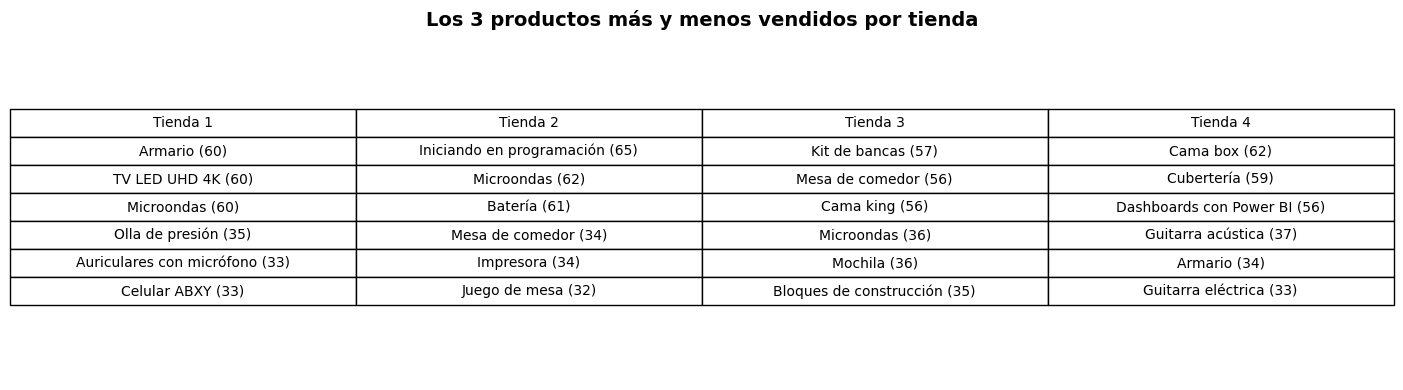

In [ ]:
import matplotlib.pyplot as plt

# Función para extraer los top y bottom 3 productos con orden correcto
def extraer_top_y_bottom_ordenados(diccionario):
    items = list(diccionario.items())
    top3 = items[:3]  # ya vienen en orden descendente
    bottom3 = items[-3:]  # en orden ascendente, así que lo dejamos tal cual
    return top3 + bottom3

# Extraer los productos de cada tienda
productos_tienda1 = extraer_top_y_bottom_ordenados(Ventas_por_Producto_Tienda1)
productos_tienda2 = extraer_top_y_bottom_ordenados(Ventas_por_Producto_Tienda2)
productos_tienda3 = extraer_top_y_bottom_ordenados(Ventas_por_Producto_Tienda3)
productos_tienda4 = extraer_top_y_bottom_ordenados(Ventas_por_Producto_Tienda4)

# Preparar la tabla (sin columna de apoyo)
tabla_datos = []

for i in range(6):
    fila = [
        f"{productos_tienda1[i][0]} ({productos_tienda1[i][1]})",
        f"{productos_tienda2[i][0]} ({productos_tienda2[i][1]})",
        f"{productos_tienda3[i][0]} ({productos_tienda3[i][1]})",
        f"{productos_tienda4[i][0]} ({productos_tienda4[i][1]})"
    ]
    tabla_datos.append(fila)

# Crear la tabla con matplotlib
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('off')

tabla = ax.table(cellText=tabla_datos,
                 colLabels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.5)

plt.title("Los 3 productos más y menos vendidos por tienda", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

*   Podemos observar que existen distintas preferencias por tienda, como por ejemplo la mesa de comedor que esta entre las mas populares de la tienda 3 mientras que en la tienda 2 esta entre las menos populares, el microondas tambien presenta la misma tendencia entre la tienda 2 y la tienda 3.
*   **Existe una correlacion entre los productos más y menos vendidos**, donde los mas populares alcanzan un total de 56-65 ventas mientras que los menos populares entre 32-37 ventas **manteniendo una distribucion casi uniforme**.


## 5. Envío promedio por tienda

In [ ]:
# Funcion para calcular el promedio de una lista
def promedio_lista(lista):
    if len(lista) == 0:
        print("Ingrese una lista no vacía")
        return None
    return sum(lista) / len(lista)

# Calcular el promedio de envio por tienda
Tienda_avg_Envio = round(promedio_lista(tienda['Costo de envío']),2)
Tienda2_avg_Envio = round(promedio_lista(tienda2['Costo de envío']),2)
Tienda3_avg_Envio = round(promedio_lista(tienda3['Costo de envío']),2)
Tienda4_avg_Envio = round(promedio_lista(tienda4['Costo de envío']),2)

# Imprimir resultados
print("\nEl coste de envío promedio de la Tienda 1 es:\n", Tienda_avg_Envio)
print("\nEl coste de envío promedio de la Tienda 2 es:\n", Tienda2_avg_Envio)
print("\nEl coste de envío promedio de la Tienda 3 es:\n", Tienda3_avg_Envio)
print("\nEl coste de envío promedio de la Tienda 4 es:\n", Tienda4_avg_Envio)


El coste de envío promedio de la Tienda 1 es:
 26018.61

El coste de envío promedio de la Tienda 2 es:
 25216.24

El coste de envío promedio de la Tienda 3 es:
 24805.68

El coste de envío promedio de la Tienda 4 es:
 23459.46


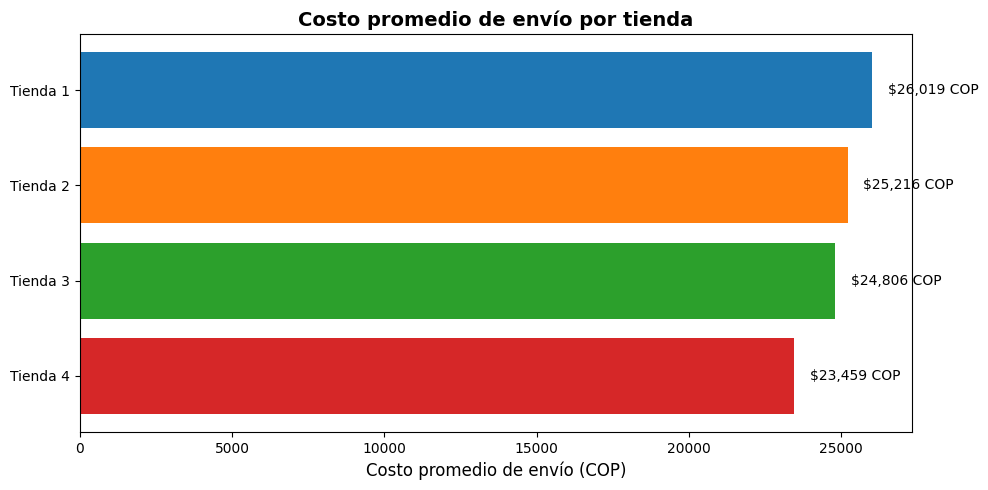

In [ ]:
import matplotlib.pyplot as plt

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [Tienda_avg_Envio, Tienda2_avg_Envio, Tienda3_avg_Envio, Tienda4_avg_Envio]
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(tiendas, costos_envio, color=colores)

# Añadir etiquetas con los valores
for bar in bars:
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height() / 2,
            f"${width:,.0f} COP", va='center', fontsize=10)

# Título y etiquetas
ax.set_xlabel('Costo promedio de envío (COP)', fontsize=12)
ax.set_title('Costo promedio de envío por tienda', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Para que Tienda 1 aparezca arriba

plt.tight_layout()
plt.show()

La diferencia de coste de envio es bastante parecida donde La tienda 4 es un poco menos de 3000 $COP mas barata que la Tienda 1.

## 6. Analisis del desempeño Geográfico

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Unir todos los datos
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Crear mapa centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Heatmap de ventas
heat_data = datos[['lat', 'lon']].values.tolist()
HeatMap(heat_data, radius=10, blur=7).add_to(mapa)

# Estadísticas por tienda
info_tiendas = datos.groupby('Tienda').agg({
    'lat': 'mean',
    'lon': 'mean',
    'Precio': ['sum', 'count'],
    'Calificación': 'mean'
}).reset_index()
info_tiendas.columns = ['Tienda', 'lat', 'lon', 'Total Ventas', 'Numero Ventas', 'Prom Calificación']

# Categoría más popular y rentable
categorias = datos.groupby(['Tienda', 'Categoría del Producto']).agg({
    'Precio': ['sum', 'count']
}).reset_index()
categorias.columns = ['Tienda', 'Categoría', 'Total Categoria', 'Numero Categoria']

info_tiendas['Categoría Popular'] = ''
info_tiendas['Ventas Populares'] = 0
info_tiendas['Monto Populares'] = 0
info_tiendas['Categoría Rentable'] = ''
info_tiendas['Ventas Rentables'] = 0
info_tiendas['Monto Rentables'] = 0

for i, row in info_tiendas.iterrows():
    tienda = row['Tienda']
    df_cat = categorias[categorias['Tienda'] == tienda]
    popular = df_cat.sort_values('Numero Categoria', ascending=False).iloc[0]
    rentable = df_cat.sort_values('Total Categoria', ascending=False).iloc[0]
    info_tiendas.at[i, 'Categoría Popular'] = popular['Categoría']
    info_tiendas.at[i, 'Ventas Populares'] = popular['Numero Categoria']
    info_tiendas.at[i, 'Monto Populares'] = popular['Total Categoria']
    info_tiendas.at[i, 'Categoría Rentable'] = rentable['Categoría']
    info_tiendas.at[i, 'Ventas Rentables'] = rentable['Numero Categoria']
    info_tiendas.at[i, 'Monto Rentables'] = rentable['Total Categoria']

# Agregar pines con resumen de cada tienda
for _, row in info_tiendas.iterrows():
    popup_text = f"""
    <b>{row['Tienda']}</b><br>
    Total ventas: ${int(row['Total Ventas']):,}<br>
    Número de ventas: {row['Numero Ventas']}<br>
    Categoría más popular: {row['Categoría Popular']} ({row['Ventas Populares']} ventas, ${int(row['Monto Populares']):,})<br>
    Categoría más rentable: {row['Categoría Rentable']} ({row['Ventas Rentables']} ventas, ${int(row['Monto Rentables']):,})<br>
    Calificación promedio: {round(row['Prom Calificación'], 2)}
    """
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='shopping-cart', prefix='fa')
    ).add_to(mapa)

# Ventas por ciudad
ventas_ciudad = datos.groupby('Lugar de Compra')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)
ventas_ciudad['Precio'] = ventas_ciudad['Precio'].apply(lambda x: f"${x:,.0f}")

# Calificaciones por ciudad
calificaciones_ciudad = datos.groupby('Lugar de Compra')['Calificación'].mean().reset_index()
calificaciones_ciudad['Calificación'] = calificaciones_ciudad['Calificación'].round(3)
calificaciones_ciudad = calificaciones_ciudad.sort_values(by='Calificación', ascending=False)

# Mostrar resultados
print("🔹 Ventas por ciudad (COP):")
print(ventas_ciudad.to_string(index=False))
print("\n🔹 Calificación promedio por ciudad:")
print(calificaciones_ciudad.to_string(index=False))

🔹 Ventas por ciudad (COP):
Lugar de Compra         Precio
         Bogotá $1,814,858,300
       Medellín $1,096,669,200
           Cali   $506,526,100
        Pereira   $225,927,300
   Barranquilla   $132,040,500
      Cartagena   $102,376,700
         Cúcuta    $99,369,100
    Bucaramanga    $90,573,300
       Riohacha    $73,879,700
        Leticia    $67,149,900
    Santa Marta    $53,100,500
          Pasto    $49,014,300
          Neiva    $20,898,000
      Manizales    $19,367,900
  Villavicencio    $13,333,600
         Soacha    $12,317,700
        Armenia    $12,242,900
        Inírida     $8,087,900
     Valledupar     $5,886,300

🔹 Calificación promedio por ciudad:
Lugar de Compra  Calificación
          Pasto         4.149
         Bogotá         4.114
     Valledupar         4.071
           Cali         4.047
      Cartagena         4.021
        Pereira         4.014
    Bucaramanga         3.978
         Cúcuta         3.941
       Medellín         3.927
        Leticia 

*   Las ciudades de Bogotá y Medellin son las que mas dinero han gastado en las tiendas, lo cual es de esperar ya que cuentan con la mayor densidad demografica.
*   Podemos observar que Valledupar es la que menos ha comprado sin embargo se encuentra entre las mejores calificadas
*   La gente de Armenia es la que ha estado menos satisfechas en base a sus calificaciones.

### 6.a Mapa Interactivo con la Densidad de Ventas (Heatmap)

In [ ]:
# Es necesario compilar el codigo anterior, para que el mapa cargue.

mapa

* Podemos observar que las areas mas rojas y con mas actividad estan en Bogotá, sin embargo es posible observar ventas a lo largo de todo el país.

* Las tiendas no poseen una ubicacion fija exactamente, sino que se obtuvo a traves de un promedio en base a las ventas, sin embargo si hace zoom es posible observar un resumen de actividad para cada tienda.

# Informe


## **Propósito del análisis**
El objetivo de este desafío es asistir al señor Juan en la toma de decisión sobre cuál de sus cuatro tiendas debería vender para invertir en un nuevo negocio. Para ello, se evaluará el desempeño de cada tienda a partir de diversos indicadores, permitiendo que la decisión esté fundamentada en datos y análisis objetivos.


## **Desarrollo del análisis**

Identificamos que el señor Juan posee 4 tiendas con actividades de ventas en distintas ciudades de Colombia, ofreciendo una variedad de distintos productos como electrodomesticos, muebles, juguetes o hasta instrumentos musicales.

Y los ingresos totales de esas tiendas son

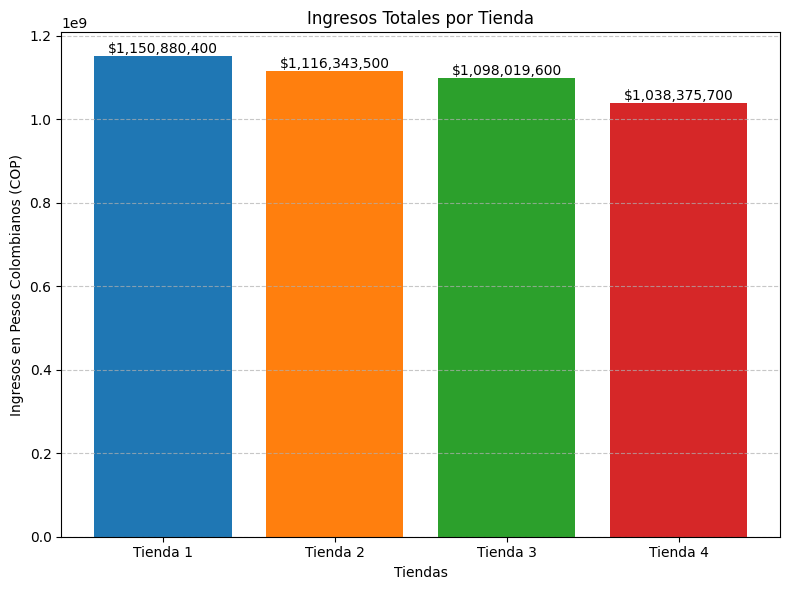

Por otro lado la distribucion de ventas de cada tienda por categoria es

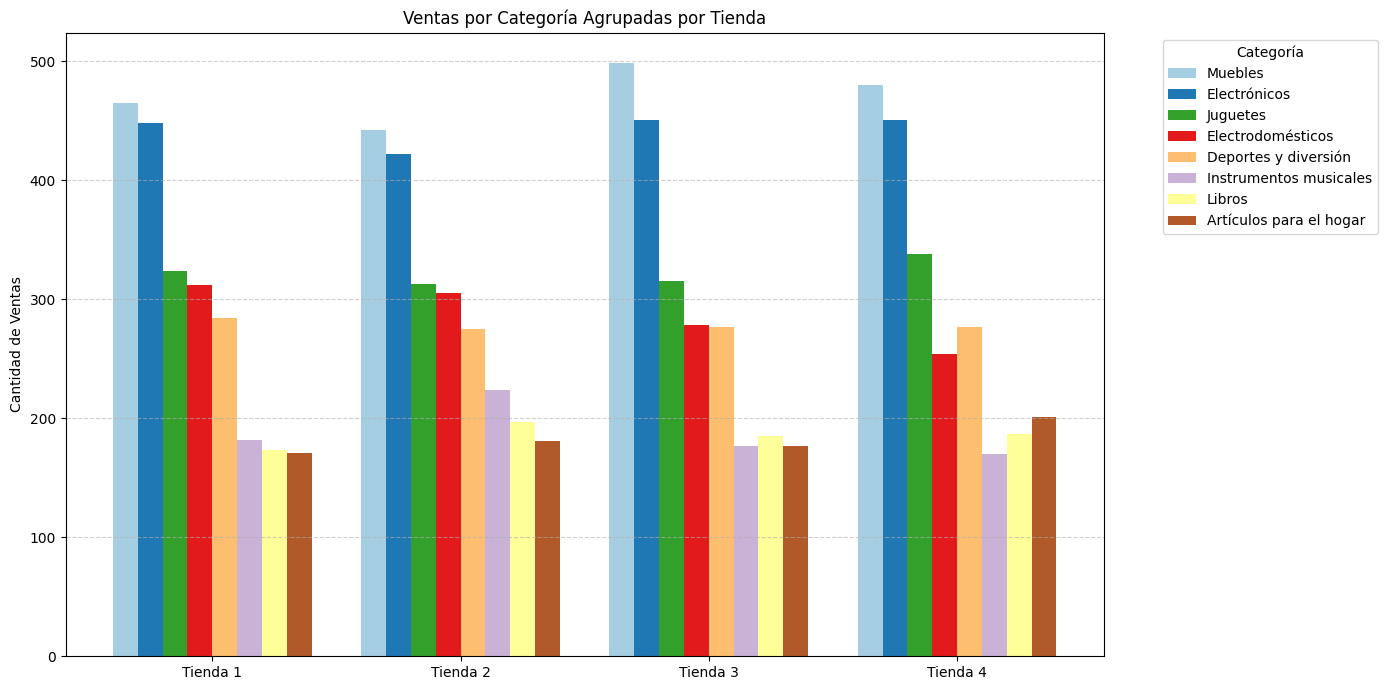

Podemos notar que aunque la Tienda 1 y 2 poseen la Mayor rentabilidad en ingresos, las ventas de la tienda 3 y 4 parecen ser superiores.

Por otro lado podemos ver que los muebles, electronicos y juguetes dominan las ventas, como se puede apreciar en el grafico de barras y tambien en el proximo:

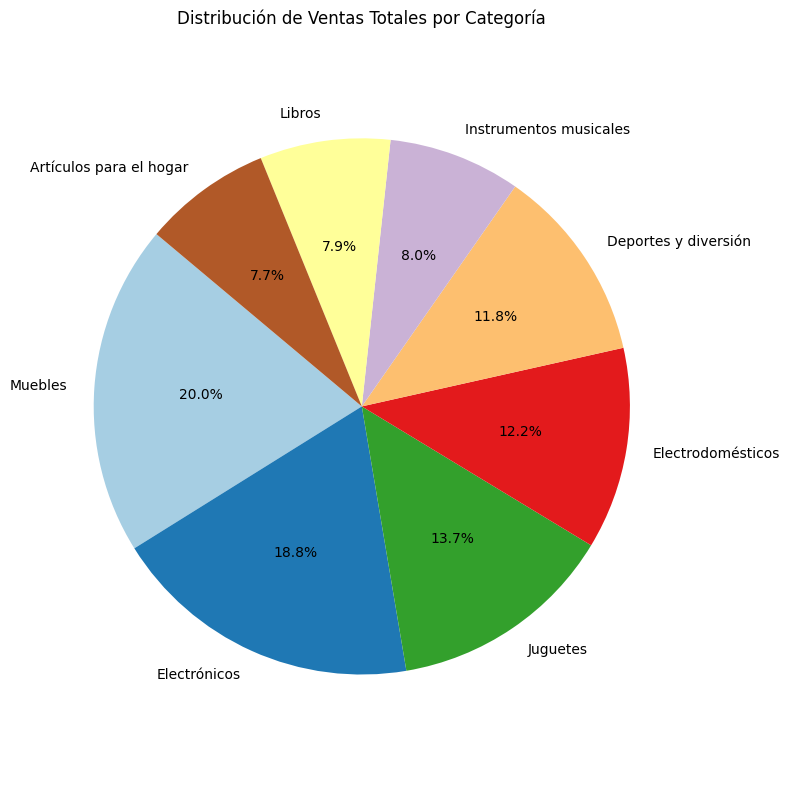

Uno podria pensar que los productos las categorias mas populares son las mas vendidas, pero podemos notar que hay ciertas excepciones que se presentan en la siguiente tabla

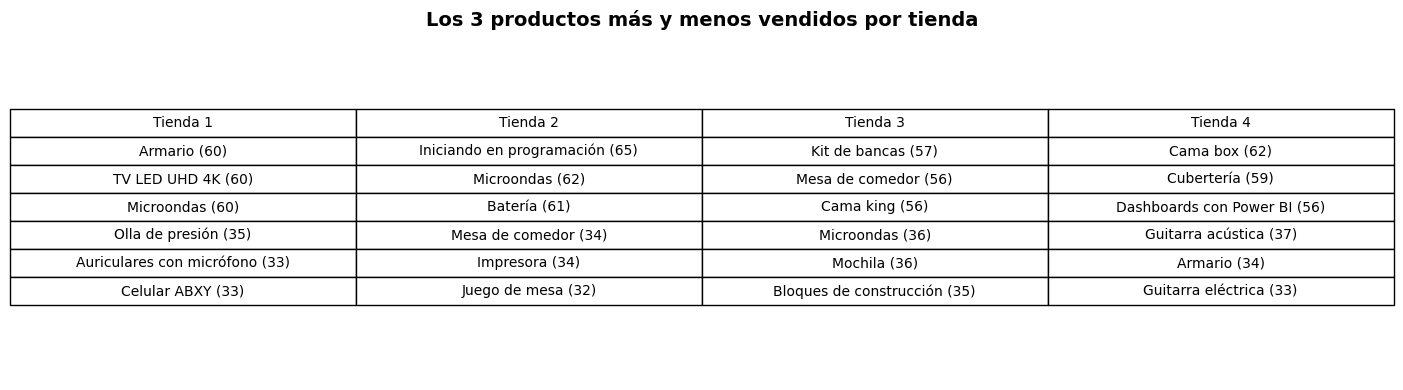

Donde podemos ver que ciertos Electrodomesticos como los Microondas son bastantes populares en la tienda 1 y 2, mientras que en la tienda 3 no lo es tanto, lo mismo ocurre con el Armario que es el mas vendido en la tienda 1 mientras que la tienda 4 uno de los peores.

Estos productos como el Armario o el Microondas son cruciales en el exito de rentabilidad de las tiendas 1 y 2.

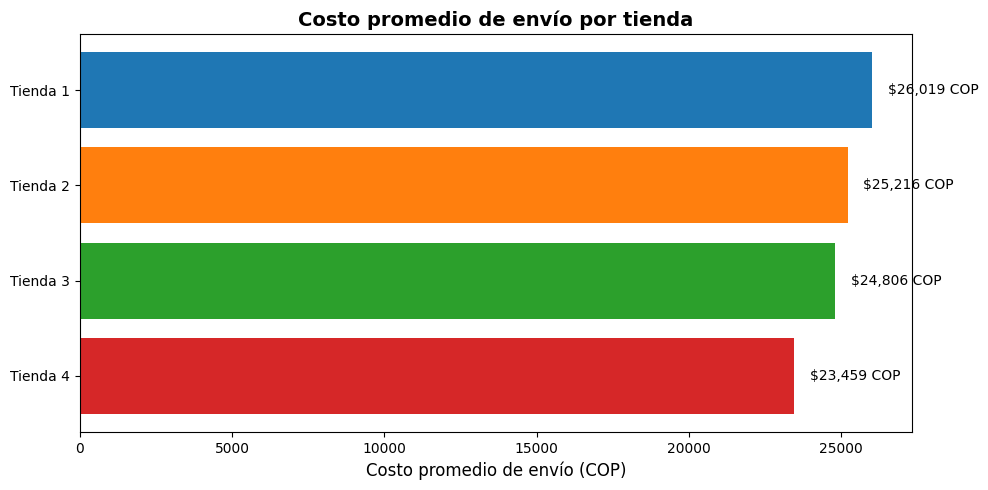

Otro factor que incide en la rentabilidad son los costes de envio, donde las tiendas que presentan la mayor rentabilidad son tambien las que tienen el mayor costo promedio de envio.

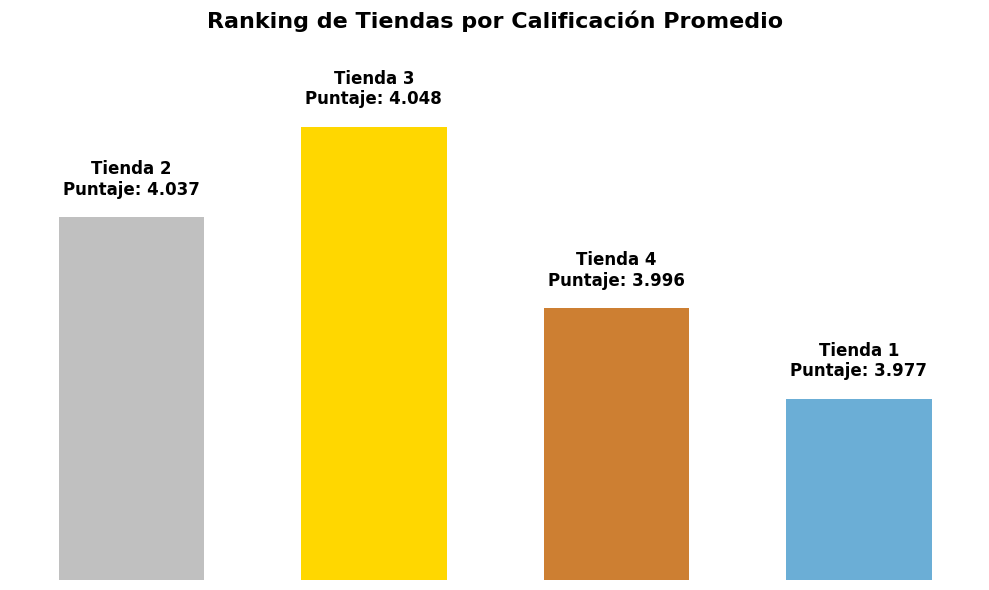

Podemos observar que de todas las tiendas la peor evaluada es la Tienda 1, mientras la tienda 3 es la mejor. Aunque la diferencia es bastante pequeña y todas las tiendas tienen un puntaje cercano a 4.

Finalmente es posible ver un mapa interactivo en la seccion "Analisis del desempeño Geografico" donde las ciudades de Bogotá y Medellín son las mas activas en pedidos.

## **Conclusión**

El señor Juan debería vender la Tienda 4, ya que es la que menos rentabilidad tiene, y puede estar relacionado a que es la que menos electrodomesticos ha vendido en comparación al resto de tiendas.

Si bien la tienda 4 posee una mejor calificacion en promedio que la tienda 1, es una diferencia bastante pequeña del orden de los decimales y la tienda 1 es la que mas rentabilidad ofrece.